# **Project: Computer Hardware Sales - United States**

## **Tujuan**
Proyek ini bertujuan untuk menganalisis data penjualan perangkat keras komputer di Amerika Serikat.  
Analisis dilakukan melalui beberapa tahapan berikut:

1. **Data Loading** – Mengimpor dan mempersiapkan data untuk dianalisis.  
2. **Data Cleaning** – Menangani data yang hilang serta melakukan transformasi data agar lebih konsisten dan siap digunakan.  
3. **Data Aggregation** – Menggabungkan dan merangkum data untuk mendapatkan informasi yang lebih terstruktur.  
4. **Data Visualization** – Membuat visualisasi untuk memudahkan pemahaman pola dan tren dalam data.  
5. **Business Insight** – Menginterpretasikan hasil analisis untuk menghasilkan wawasan yang bermanfaat bagi pengambilan keputusan bisnis.  

### **1. Data Loading**
Pada tahap ini, semua dataset yang digunakan (`products`, `agents`, `customers`, `suppliers`, dan `transactions`) dimuat ke dalam DataFrame menggunakan **pandas**.  
Langkah ini bertujuan untuk menyiapkan data agar dapat dianalisis lebih lanjut.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine


# Path file Excel
file_path = r"S:\2. Kursus dan Pembelajaran\0. Data Analytics Project\Project 8 - Computer Hardware Sales United States\Project 7 - Analyzing Computer Hardware Sales Python\computers_hardware.xlsx"

# Membaca semua sheet sekaligus
all_sheets = pd.read_excel(file_path, sheet_name=None)

# Assign dataframe untuk setiap sheet
agents = all_sheets.get("agents")
customers = all_sheets.get("customers")
transactions = all_sheets.get("transactions")
products = all_sheets.get("products")
suppliers = all_sheets.get("suppliers")

# Cek isi awal dari setiap dataframe
print("Agents:")
print(agents.head(), "\n")

print("Customers:")
print(customers.head(), "\n")

print("Transactions:")
print(transactions.head(), "\n")

print("Products:")
print(products.head(), "\n")

print("Suppliers:")
print(suppliers.head(), "\n")

Agents:
   agent_id      agent_name  gender  agent_age date_of_birth  \
0         1   Natalie Smith    Male       37.0    1988-04-14   
1         2    Ronald Villa    Male       41.0    1984-02-29   
2         3      Dana Stone    Male       26.0    1999-04-09   
3         4   Joseph Rogers  Female       26.0    1964-08-28   
4         5  Sarah Castillo    Male       30.0    1995-05-28   

            agent_phone                 agent_email work_region signup_date  \
0         (013)787-7063   natalie_smith_1@gmail.com        West  2023-03-28   
1  +1-187-524-8352x5980    ronald_villa_2@gmail.com     Midwest  2025-05-16   
2     (465)825-7200x565      dana_stone_3@gmail.com       South  2023-01-21   
3          539.218.9874   joseph_rogers_4@gmail.com        East  2020-11-27   
4  +1-287-715-1739x3567  sarah_castillo_5@gmail.com       South  2020-11-14   

  agent_status  
0       Active  
1     Inactive  
2       Active  
3       Active  
4       Active   

Customers:
   customer_id   

- Mengimpor **pandas** untuk manipulasi data, serta **matplotlib** dan **seaborn** untuk visualisasi.  
- Membaca data dari file `.xlsx` menggunakan fungsi `pd.read_excel()`.  
- Menampilkan 3 baris pertama dari setiap dataset dengan `display(df.head(3))` untuk mengenali struktur tabel.  

### **2. Data Cleaning: Pengecekan Missing Value**
Langkah awal dalam proses pembersihan data adalah memeriksa adanya nilai yang hilang (`NaN`).  
Penanganan nilai hilang dapat dilakukan dengan beberapa cara, antara lain:  

- **Menghapus baris** yang mengandung nilai hilang, jika jumlahnya relatif sedikit dan tidak memengaruhi analisis.  
- **Melakukan imputasi** dengan mengganti nilai hilang menggunakan rata-rata (*mean*), median, atau modus, tergantung pada karakteristik datanya.  

In [7]:
# Mengecek missing values di tiap dataset
print("Products Missing Values :")
print(products.isnull().sum())

print("\nAgents Missing Values:")
print(agents.isnull().sum())

print("\nCustomers Missing Values:")
print(customers.isnull().sum())

print("\nSuppliers Missing Values:")
print(suppliers.isnull().sum())

print("\nTransactions Missing Values:")
print(transactions.isnull().sum())

Products Missing Values :
release_date       0
product_id         0
product_name       0
brand              0
category           0
model              0
specifications     0
cost_price         0
unit_price         0
stock_quantity     0
warranty_months    0
weight_gram        0
dtype: int64

Agents Missing Values:
agent_id         0
agent_name       4
gender           0
agent_age        4
date_of_birth    1
agent_phone      3
agent_email      2
work_region      1
signup_date      1
agent_status     0
dtype: int64

Customers Missing Values:
customer_id        0
customer_name      0
gender             0
customer_type      0
occupation         0
monthly_income     0
customer_age      10
customer_phone     1
customer_email     5
state              0
dtype: int64

Suppliers Missing Values:
supplier_id       0
supplier_name     0
contact_name      3
supplier_phone    3
supplier_email    4
city              1
state             0
website           5
dtype: int64

Transactions Missing Values:
sa

- Fungsi `isnull().sum()` digunakan untuk menghitung jumlah nilai kosong pada setiap kolom.  
  Dari hasil ini, kita dapat mengidentifikasi dataset mana yang memerlukan penanganan lebih lanjut (baik dengan menghapus baris maupun melakukan imputasi).  
- Pada dataset beberapa dasaset ditemukan adanya *missing value*.  
  Oleh karena itu, diperlukan langkah penanganan seperti penghapusan data tertentu atau imputasi nilai yang sesuai.  

Langkah pertama, kita akan mencoba untuk mengisi nilai (imputation) pada beberapa kolom numerik yang terdapat missing value :

In [8]:
# Isi beberapa data missing value dengan imputasi

# Data Agent
# Isi data umur agen dengan nilai rata-rata keseluruhan umur agen
agents = agents.fillna(agents["agent_age"].mean())

# Data customers
# Isi data umur customers dengan nilai rata-rata keselurhan umur agent
customers = customers.fillna(customers["customer_age"].mean())

# Data Transactions
# Isi data beberapa rating dengan rata-rata
transactions[["product_quality_rating",
              "price_fairness_rating",
              "durability_rating",
              "usability_rating",
              "design_rating"]] = transactions[["product_quality_rating",
                                                   "price_fairness_rating",
                                                   "durability_rating",
                                                   "usability_rating",
                                                   "design_rating"]].fillna(transactions[["product_quality_rating",
                                                                                             "price_fairness_rating",              
                                                                                             "durability_rating",
                                                                                             "usability_rating",
                                                                                             "design_rating"]].mean())

Selanjutnya kita akan melakukan drop pada beberapa baris yang terdapat missing value

In [9]:
# Drop baris NA pada agents
agents = agents.dropna()

# Drop baris NA pada customers
customers = customers.dropna()

# Drop baris NA pada transactions
transactions = transactions.dropna()

# Drop baris NA pada suppliers
suppliers = suppliers.dropna()

Selanjutnya, kita akan melakukan pengecekan kembali pada data yang telah kita cleaning.

In [10]:
# Mengecek missing values di tiap dataset
print("Products Missing Values :")
print(products.isnull().sum())

print("\nAgents Missing Values:")
print(agents.isnull().sum())

print("\nCustomers Missing Values:")
print(customers.isnull().sum())

print("\nSuppliers Missing Values:")
print(suppliers.isnull().sum())

print("\nTransactions Missing Values:")
print(transactions.isnull().sum())

Products Missing Values :
release_date       0
product_id         0
product_name       0
brand              0
category           0
model              0
specifications     0
cost_price         0
unit_price         0
stock_quantity     0
warranty_months    0
weight_gram        0
dtype: int64

Agents Missing Values:
agent_id         0
agent_name       0
gender           0
agent_age        0
date_of_birth    0
agent_phone      0
agent_email      0
work_region      0
signup_date      0
agent_status     0
dtype: int64

Customers Missing Values:
customer_id       0
customer_name     0
gender            0
customer_type     0
occupation        0
monthly_income    0
customer_age      0
customer_phone    0
customer_email    0
state             0
dtype: int64

Suppliers Missing Values:
supplier_id       0
supplier_name     0
contact_name      0
supplier_phone    0
supplier_email    0
city              0
state             0
website           0
dtype: int64

Transactions Missing Values:
sale_id     

Berdasarkan hasil proses pembersihan data, seluruh nilai hilang pada beberapa dataset telah berhasil ditangani sehingga tidak ada lagi missing value.  
Dengan demikian, tahap berikutnya adalah melakukan analisis data menggunakan **query SQL** untuk representasi tabel, serta **matplotlib** dan **seaborn** untuk visualisasi.  

### **3. Melakukan Analisis, Agregasi, dan Transformasi Data**
Pada analisis kali ini, saya akan berfokus pada beberapa pertanyaan dari masalah bisnis yang sedang dihadapi, yaitu :

1. Analisis Transaksi (`transactions`) yang meliputi :
   - Bagaimana tren total transaksi, dan pendapatan per bulan/tahun?
   - Bagaimana korelasi antara Total Transaksi dan Total Pendapatan?
   - Metode pembayaran apa yang paling sering digunakan?
   - Bagaimana distribusi penilaian rating produk?

2. Analisis Produk (`products`) yang meliputi :
   - Produk apa yang laris terjual?
   - Kategori produk apa yang memberikan profit tertinggi?
  
3. Analisis Pelanggan (`customers`) yang meliputi :
   - Provinsi mana yang memiliki total transaksi terbanyak?
   - Bagaimana tren pembelian pelanggan per bulan berdasarkan tipe customer?
   - Bagaimana distribusi umur customer?
   - Bagaimana segmentasi pelanggan berdasarkan pendapatan bulanan pelanggan?

### **A. Analisis Data `transactions`**
Pada analisis pertama kita akan berfokus pada dataframe `transactions` sebagai dataframe utama untuk analisis. Kita akan mencoba untuk melihat ringkasan statistiknya terlebih dahuulu.

In [11]:
# Melihat ringkasan statistik
print(transactions.describe())

            sale_id                      sale_date   customer_id  \
count  16234.000000                          16234  16234.000000   
mean    8118.757731  2023-03-30 01:05:11.790070272   2943.396082   
min        1.000000            2020-08-17 00:00:00      1.000000   
25%     4060.250000            2022-01-04 00:00:00   1242.250000   
50%     8118.500000            2023-04-26 00:00:00   2877.500000   
75%    12176.750000            2024-07-06 00:00:00   4570.750000   
max    16239.000000            2025-07-30 00:00:00   6250.000000   
std     4687.051968                            NaN   1849.651591   

        supplier_id      agent_id    product_id      quantity  selling_price  \
count  16234.000000  16234.000000  16234.000000  16234.000000   16234.000000   
mean       8.775902    100.169521    695.108106      2.619995     232.985530   
min        1.000000      1.000000      1.000000      1.000000       9.450000   
25%        3.000000     50.000000    332.000000      2.000000      

##### **1. Analisis Tren Total Pendapatan per Bulan**
Analisis dimulai dengan menggunakan tabel **transactions** sebagai tabel utama.  
Tujuan dari analisis ini adalah untuk melihat bagaimana tren jumlah transaksi dan total pendapatan setiap bulannya.  

C:\Users\Feby Renaldi\AppData\Local\Temp\ipykernel_6584\251646683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["sale_date"] = pd.to_datetime(transactions["sale_date"])
C:\Users\Feby Renaldi\AppData\Local\Temp\ipykernel_6584\251646683.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions["month"] = transactions["sale_date"].dt.to_period("M").dt.to_timestamp()
C:\Users\Feby Renaldi\AppData\Local\Temp\ipykernel_6584\251646683.py:93: UserWarning: Glyph 128176 (\N{MONEY BAG}) missi

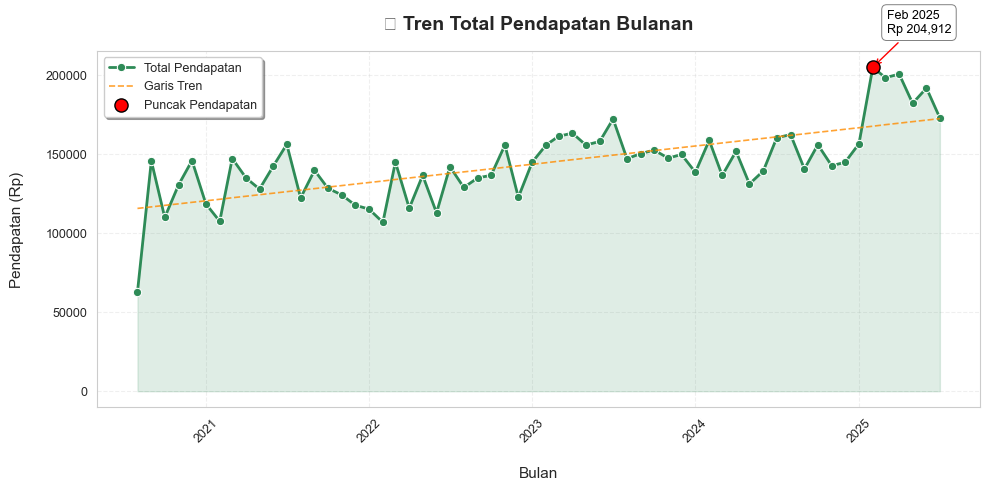

In [12]:
# Pastikan sale_date dalam datetime
transactions["sale_date"] = pd.to_datetime(transactions["sale_date"])

# Buat kolom bulan
transactions["month"] = transactions["sale_date"].dt.to_period("M").dt.to_timestamp()

# Agregasi pendapatan bulanan
monthly_revenue = (
    transactions.groupby("month")["total_amount"]
    .sum()
    .reset_index(name="revenue")
)

# Variabel untuk regresi
x = np.arange(len(monthly_revenue))
y = monthly_revenue["revenue"].values

# Hitung garis tren linear
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Cari titik maksimum
max_idx = monthly_revenue["revenue"].idxmax()
max_point = monthly_revenue.loc[max_idx]

# Plot grafik
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")

# Garis utama dengan marker
sns.lineplot(
    x="month",
    y="revenue",
    data=monthly_revenue,
    linewidth=2,
    color="seagreen",
    marker="o",
    markersize=6,
    label="Total Pendapatan"
)

# Area bawah garis
plt.fill_between(
    monthly_revenue["month"],
    monthly_revenue["revenue"],
    alpha=0.15,
    color="seagreen"
)

# Garis tren linear
plt.plot(
    monthly_revenue["month"],
    p(x),
    linestyle="--",
    linewidth=1.2,
    color="darkorange",
    alpha=0.8,
    label="Garis Tren"
)

# Titik maksimum
plt.scatter(
    max_point["month"],
    max_point["revenue"],
    color="red",
    s=90,
    edgecolor="black",
    zorder=5,
    label="Puncak Pendapatan"
)

# Anotasi titik maksimum
plt.annotate(
    f"{max_point['month'].strftime('%b %Y')}\nRp {max_point['revenue']:,.0f}",
    xy=(max_point["month"], max_point["revenue"]),
    xytext=(10, 25),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color="red", lw=1),
    fontsize=9,
    color="black",
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="gray", lw=0.7)
)

# Tambahan estetika
plt.title("💰 Tren Total Pendapatan Bulanan", fontsize=14, weight="bold", pad=15)
plt.xlabel("\nBulan", fontsize=11)
plt.ylabel("Pendapatan (Rp)\n", fontsize=11)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.legend(fontsize=9, frameon=True, fancybox=True, shadow=True, loc="upper left")
plt.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


- Berdasarkan hasil visualisasi tren, terlihat bahwa total pendapatan menunjukkan kenaikan dari tahun ke tahun, meskipun laju pertumbuhannya tidak terlalu signifikan.  
- Puncak pendapatan tertinggi terjadi pada **Februari 2025** dengan total pendapatan sebesar **USD $204.912**.  
- Temuan ini dapat menjadi acuan positif terhadap perkembangan transaksi serta menjadi motivasi bagi perusahaan untuk terus meningkatkan produk dan menyusun strategi pemasaran yang lebih efektif.  

##### **2. Analisis Tren Total Transaksi per Bulan**
Analisis berikutnya berfokus pada tren jumlah transaksi yang terjadi setiap bulan.  
Tujuan dari analisis ini adalah untuk mengetahui pola aktivitas transaksi dari waktu ke waktu dan melihat periode dengan frekuensi transaksi tertinggi.  

C:\Users\Feby Renaldi\AppData\Local\Temp\ipykernel_6584\2440307244.py:87: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Feby Renaldi\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


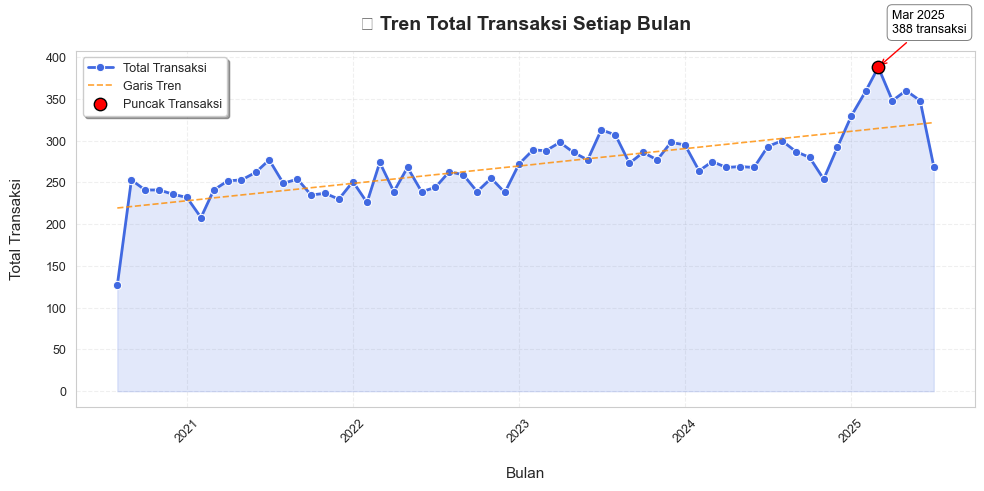

In [13]:
# Melakukan agregasi data terhadap jumlah pendapatan per bulan
monthly_transactions = (
    transactions.groupby("month")["sale_id"]
    .count()
    .reset_index(name="total_transaction")
)

# Mengubah month untuk regresi
x = np.arange(len(monthly_transactions))
y = monthly_transactions["total_transaction"].values

# Menghitung persamaan garis tren linear
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Cari titik maksimum
max_idx = monthly_transactions["total_transaction"].idxmax()
max_point = monthly_transactions.loc[max_idx]

# Membuat grafik tren transaksi per bulan
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")

# Garis tren utama
sns.lineplot(
    x="month",
    y="total_transaction",
    data=monthly_transactions,
    linewidth=2,
    color="royalblue",
    marker="o",
    markersize=6,
    label="Total Transaksi"
)

# Isi area bawah garis
plt.fill_between(
    monthly_transactions["month"],
    monthly_transactions["total_transaction"],
    alpha=0.15,
    color="royalblue"
)

# Membuat garis tren linear
plt.plot(
    monthly_transactions["month"],
    p(x),
    linestyle="--",
    linewidth=1.2,
    color="darkorange",
    alpha=0.8,
    label="Garis Tren"
)

# Titik maksimum
plt.scatter(
    max_point["month"],
    max_point["total_transaction"],
    color="red",
    s=80,
    edgecolor="black",
    zorder=5,
    label="Puncak Transaksi"
)

# Anotasi detail
plt.annotate(
    f"{max_point['month'].strftime('%b %Y')}\n{max_point['total_transaction']} transaksi",
    xy=(max_point["month"], max_point["total_transaction"]),
    xytext=(10, 25),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", color="red", lw=1),
    fontsize=9,
    color="black",
    bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="gray", lw=0.7)
)

# Tambahan estetika
plt.title("📈 Tren Total Transaksi Setiap Bulan", fontsize=14, weight="bold", pad=15)
plt.xlabel("\nBulan", fontsize=11)
plt.ylabel("Total Transaksi\n", fontsize=11)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.legend(fontsize=9, frameon=True, fancybox=True, shadow=True, loc="upper left")
plt.grid(True, linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()


- Berdasarkan hasil visualisasi, terlihat bahwa tren total transaksi per bulan juga menunjukkan peningkatan dari waktu ke waktu.  
- Puncak jumlah transaksi terjadi pada **Maret 2025**, dengan total sebanyak **388 transaksi**.  
- Hasil ini selaras dengan tren pendapatan sebelumnya, sehingga dapat dijadikan acuan tambahan bagi perusahaan dalam memahami kondisi penjualan serta menentukan strategi peningkatan yang perlu dilakukan ke depannya.  

##### **3. Analisis Korelasi antara Total Transaksi dan Total Pendapatan**
Analisis ini bertujuan untuk melihat hubungan antara jumlah transaksi dengan total pendapatan setiap bulan.  
Dengan demikian, kita dapat mengetahui apakah peningkatan jumlah transaksi berbanding lurus dengan kenaikan total pendapatan.  

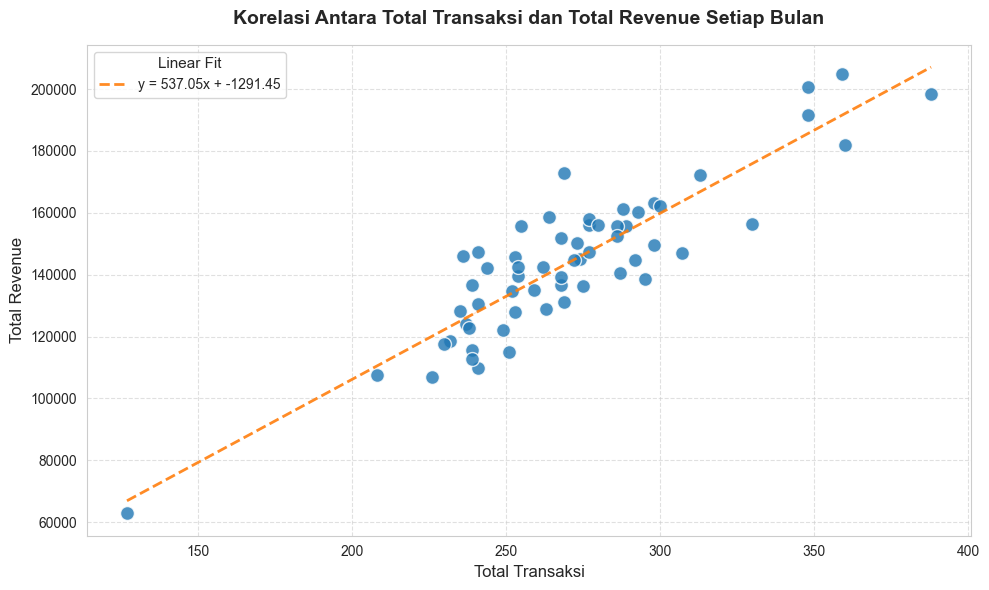

In [14]:
# Melakukan agregasi terhadap total transaksi dan total revenue
monthly_revenue = transactions.groupby("month")["total_amount"].sum().reset_index(name = "revenue")
monthly_transactions = transactions.groupby("month")["sale_id"].count().reset_index(name = "transaction")

# Style
sns.set_style("whitegrid")

# Variabel x dan y
x_values = monthly_transactions["transaction"].values
y_values = monthly_revenue["revenue"].values

# Linear regression
coef = np.polyfit(x_values, y_values, 1)  # slope, intercept
linear_fit = np.polyval(coef, x_values)

# Persamaan garis
equation = f"y = {coef[0]:.2f}x + {coef[1]:.2f}"

# Plot
plt.figure(figsize=(10,6))

# Scatter
sns.scatterplot(
    x=x_values,
    y=y_values,
    color="#1f77b4",
    s=100,  # ukuran marker lebih besar
    alpha=0.8,
    edgecolor="white",
    linewidth=1
)

# Linear fit line
sns.lineplot(
    x=x_values,
    y=linear_fit,
    color="#ff7f0e",
    linestyle="--",
    linewidth=2,
    alpha=0.9,
    label=equation  # tampilkan persamaan di legend
)

# Title & labels
plt.title("Korelasi Antara Total Transaksi dan Total Revenue Setiap Bulan", fontsize=14, weight="bold", pad=15)
plt.xlabel("Total Transaksi", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)

# Legend
plt.legend(title="Linear Fit", fontsize=10, title_fontsize=11, loc="best")

# Grid tipis
plt.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

- Berdasarkan hasil visualisasi, terlihat bahwa terdapat korelasi positif antara total transaksi dan total pendapatan.  
- Hal ini menunjukkan bahwa semakin besar jumlah transaksi, maka total pendapatan juga cenderung meningkat.  
- Temuan ini menjadi indikator positif bahwa perusahaan telah berhasil menjalankan sistem penjualan yang seimbang dan efektif.  

##### **4. Analisis Metode Pembayaran**
- Analisis berikutnya berfokus pada metode pembayaran yang digunakan pelanggan dalam melakukan transaksi.  
- Terdapat beberapa jenis metode pembayaran yang tercatat, dan tujuan analisis ini adalah untuk mengetahui metode pembayaran mana yang paling disukai pelanggan.  
- Selain itu, metode pembayaran juga akan dianalisis berdasarkan segmen pelanggan, yaitu **Wholesale** dan **Retail**, untuk melihat preferensi pada masing-masing segmen.  

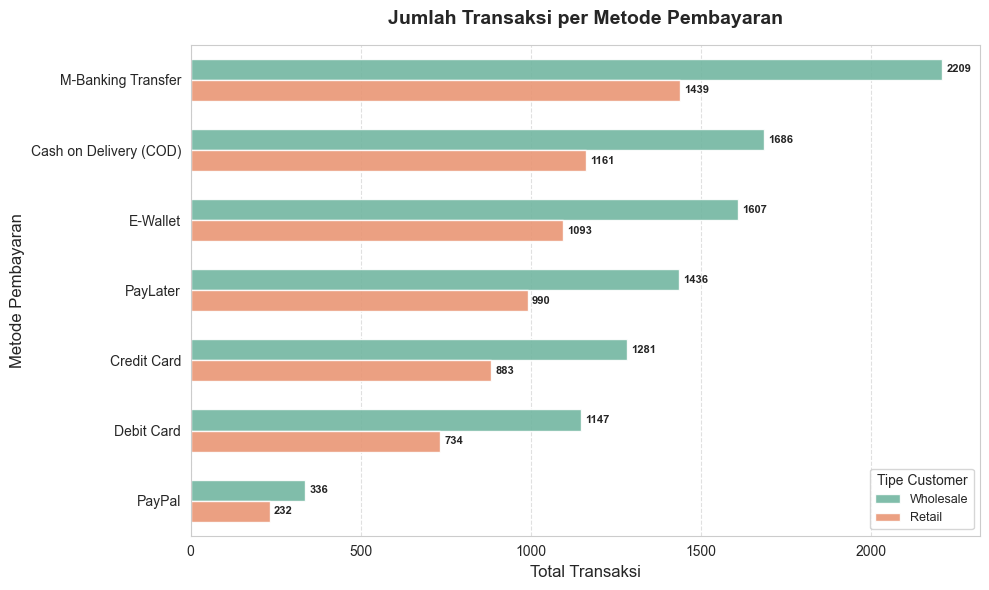

In [15]:
# Gabungkan tabel transactions dengan customers
transactions_customers = transactions.merge(customers, on="customer_id", how="inner")

# Filter payment_method yang tidak null
transactions_customers = transactions_customers[transactions_customers["payment_method"].notnull()]

# Hitung jumlah transaksi per payment_method dan customer_type
transactions_customers_grouped = (
    transactions_customers.groupby(["payment_method", "customer_type"])
    .size()
    .reset_index(name="total_payment")
    .sort_values(by="payment_method")
)

# Set style
sns.set_style("whitegrid")

# Membuat canvas
plt.figure(figsize=(10,6))

# Horizontal bar chart
bars = sns.barplot(
    data=transactions_customers_grouped.sort_values(by="total_payment", ascending=False),
    y="payment_method",
    x="total_payment",
    hue="customer_type",
    palette="Set2",
    width=0.6,
    alpha=0.9
)

# Tambahkan label di setiap bar
for container in bars.containers:
    bars.bar_label(container, fmt="%.0f", padding=3, fontsize=8, weight="bold")

# Judul dan label axis
plt.title("Jumlah Transaksi per Metode Pembayaran", fontsize=14, weight="bold", pad=15)
plt.xlabel("Total Transaksi", fontsize=12)
plt.ylabel("Metode Pembayaran", fontsize=12)

# Grid halus
plt.grid(axis="x", linestyle="--", alpha=0.6)

# Legend rapi
plt.legend(title="Tipe Customer", fontsize=9, title_fontsize=10, loc="best", frameon=True)

# Rapikan layout
plt.tight_layout()
plt.show()

- Berdasarkan hasil visualisasi, terlihat perbandingan antar metode pembayaran pada tabel transaksi, di mana warna pada grafik bar dibedakan lagi berdasarkan segmen pelanggan.  
- Secara umum, pelanggan **Wholesale** mendominasi keseluruhan transaksi.  
- Metode pembayaran yang paling sering digunakan, baik oleh pelanggan Wholesale maupun Retail, adalah **m-banking transfer**.  
- Metode pembayaran **Cash on Delivery (COD)** menempati peringkat kedua. Hal ini menunjukkan bahwa sebagian pelanggan lebih menyukai pembayaran secara langsung agar dapat melakukan pengecekan barang di tempat. Dengan demikian, potensi kesalahpahaman antara penjual dan pembeli dapat diminimalisir.  
- Temuan ini dapat menjadi dasar bagi perusahaan untuk mengembangkan strategi pemasaran, misalnya dengan membuka toko atau outlet fisik di lokasi yang strategis untuk mendukung metode pembayaran COD dan meningkatkan kepercayaan pelanggan.  

##### **5. Analisis Rating-Rating Transaksi**

Pada DataFrame `transactions`, terdapat 5 jenis rating, yaitu:  
1. `product_quality_rating`  
2. `price_fairness_rating`  
3. `durability_rating`  
4. `design_rating`  
5. `usability_rating`  
- Untuk analisis kali ini, fokus diarahkan pada dua aspek utama, yaitu **`product_quality_rating`** dan **`price_fairness_rating`**.  
- Tujuannya adalah untuk mengevaluasi kualitas produk serta kewajaran harga, sehingga dapat disesuaikan dengan strategi produksi dan penetapan harga.  
- Untuk memahami pola distribusi dari masing-masing rating, akan dibuat **histogram** dalam satu canvas agar perbandingan keduanya lebih mudah diamati.  

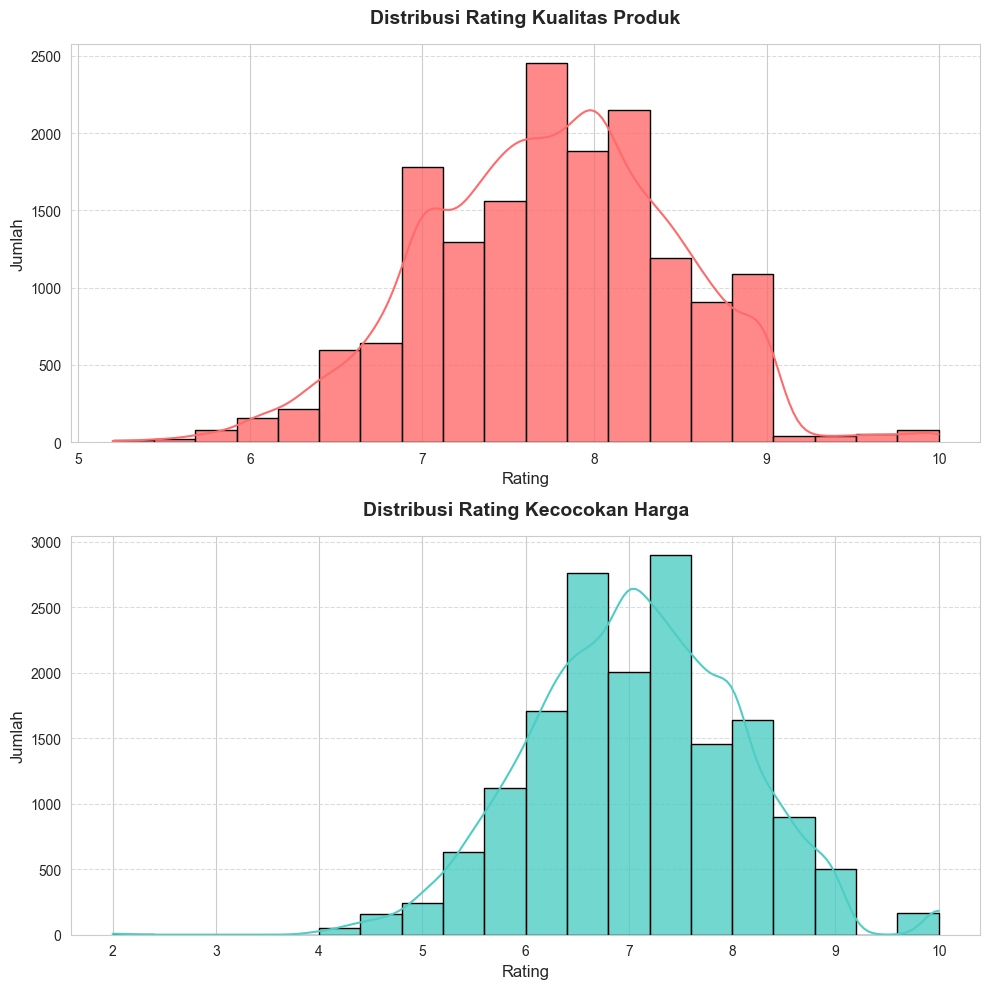

In [16]:
# Set style
sns.set_style("whitegrid")

# Canvas 2 baris 1 kolom
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# --- Histogram product_quality_rating ---
sns.histplot(
    data=transactions,
    x="product_quality_rating",
    bins=20,
    kde=True,
    color="#FF6B6B",       # warna lembut merah
    edgecolor="black",
    ax=axes[0],
    alpha=0.8
)

axes[0].set_title("Distribusi Rating Kualitas Produk", fontsize=14, weight="bold", pad=15)
axes[0].set_xlabel("Rating", fontsize=12)
axes[0].set_ylabel("Jumlah", fontsize=12)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

# --- Histogram price_fairness_rating ---
sns.histplot(
    data=transactions,
    x="price_fairness_rating",
    bins=20,
    kde=True,
    color="#4ECDC4",       # warna hijau toska lembut
    edgecolor="black",
    ax=axes[1],
    alpha=0.8
)

axes[1].set_title("Distribusi Rating Kecocokan Harga", fontsize=14, weight="bold", pad=15)
axes[1].set_xlabel("Rating", fontsize=12)
axes[1].set_ylabel("Jumlah", fontsize=12)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

# Rapikan layout
plt.tight_layout()
plt.show()


Berdasarkan hasil visualisasi:  
- Distribusi kedua rating menunjukkan kecenderungan bahwa konsumen memberikan penilaian pada kisaran menengah ke atas (6–8), bukan pada nilai ekstrem.  
- Hal ini mencerminkan persepsi bahwa produk dinilai cukup berkualitas dan harga dianggap cukup adil, meskipun belum mencapai tingkat penilaian “sempurna”.  
- Bagi perusahaan, temuan ini menjadi sinyal adanya kepuasan positif dari konsumen. Namun, masih terdapat ruang untuk perbaikan, khususnya dalam meningkatkan kualitas produk dan memperkuat persepsi kewajaran harga agar lebih sering memperoleh penilaian 9–10.  

#### **B. Analisis Produk (Products) pada Transaksi**
Analisis kedua berfokus pada hubungan antara DataFrame `products` dengan `transactions`. Beberapa poin analisis yang akan dilakukan antara lain:  

**1. Produk dengan Kuantitas Penjualan Terbanyak** : Analisis ini bertujuan untuk mengetahui produk mana yang paling banyak terjual berdasarkan jumlah kuantitas. Visualisasi yang digunakan adalah **bar chart**.  

**2. Kategori Produk dengan Margin Profit Tertinggi** : Analisis ini bertujuan untuk mengidentifikasi kategori produk yang memberikan kontribusi margin profit terbesar, sehingga dapat menjadi acuan dalam strategi produksi dan pemasaran.  

##### **1. Kuantitas Produk yang Paling Banyak Terjual**
Analisis pertama berfokus pada produk yang paling laris berdasarkan jumlah unit terjual. Data diambil dari tabel **transactions** yang digabungkan dengan tabel **products**, kemudian dibatasi pada **10 produk teratas** dengan kuantitas penjualan tertinggi.  

C:\Users\Feby Renaldi\AppData\Local\Temp\ipykernel_6584\4107698085.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


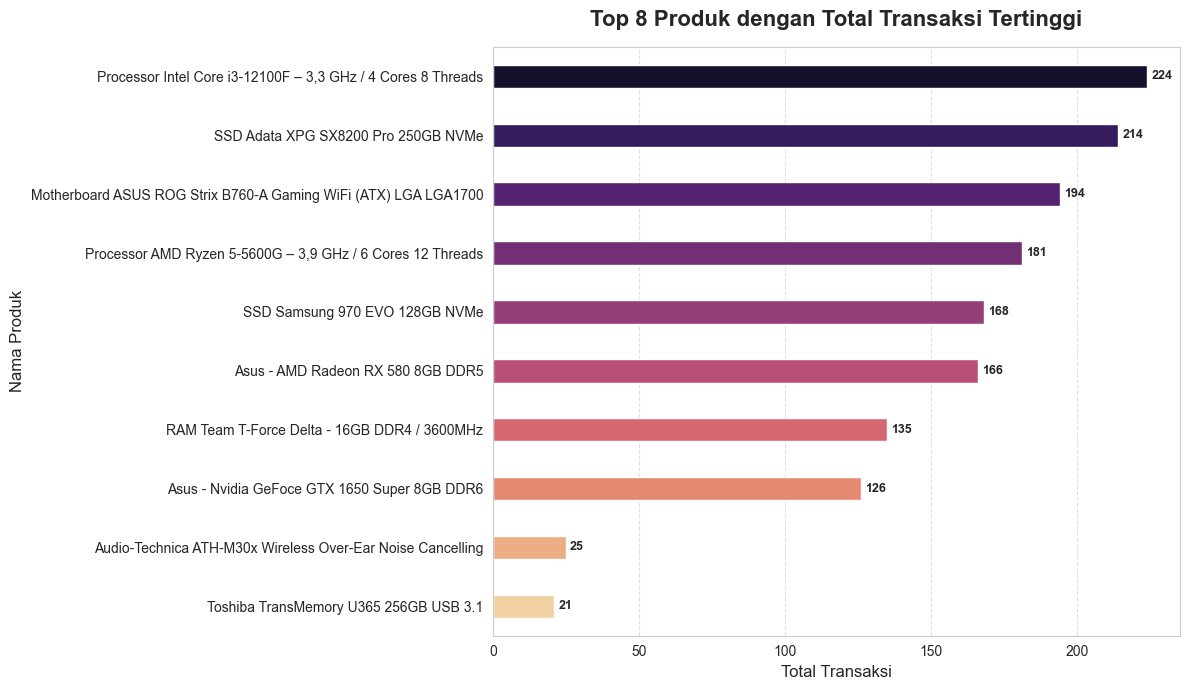

In [17]:
# Menggabungkan data transactions dan products
transactions_products = transactions.merge(products, on = "product_id", how = "inner")

# Melakukan kalkulasi top 10 unit
top_products = (transactions_products.groupby(["product_id", "product_name"])["sale_id"]
                .count()
                .reset_index(name = "total_transaction")
                .sort_values(by = "total_transaction", ascending = False)
                .head(10)
                )

# Membuat plot
# Set style seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))

# Pakai palet gradien
palette = sns.color_palette("magma", n_colors=len(top_products))

bars = sns.barplot(
    data=top_products,
    y="product_name",
    x="total_transaction",
    palette=palette,
    width=0.4
)

# Tambahkan label angka
for container in bars.containers:
    bars.bar_label(
        container,
        fmt="%.0f",
        padding=3,
        fontsize=9,
        weight="bold"
    )

# Judul & axis
plt.title("Top 8 Produk dengan Total Transaksi Tertinggi", fontsize=16, weight="bold", pad=15)
plt.xlabel("Total Transaksi", fontsize=12)
plt.ylabel("Nama Produk", fontsize=12)

# Hilangkan legend redundant
plt.legend([], [], frameon=False)

# Tambahkan grid vertikal
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi, terlihat bahwa produk dengan nama **`Processor Intel Core i3-12100F`** merupakan produk yang paling banyak terjual, dengan total penjualan mencapai **224 unit**.  

Temuan ini menunjukkan bahwa produk tersebut memiliki tingkat permintaan yang tinggi di pasar.  
Bagi perusahaan, hal ini dapat dijadikan acuan untuk:  
- Menetapkan produk ini sebagai **produk unggulan (best seller)** dalam strategi pemasaran.  
- Menjaga ketersediaan stok agar permintaan pelanggan dapat selalu terpenuhi.  
- Mempertimbangkan strategi promosi bundling dengan produk lain untuk mendorong penjualan tambahan.  
- Melakukan analisis lebih lanjut terkait margin profit dari produk ini untuk memastikan kontribusi keuntungan tetap optimal.  

##### **2. Top 10 Kategori Produk dengan Profit Tertinggi**
Analisis berikutnya berfokus pada kategori produk yang memberikan margin profit terbesar bagi perusahaan.   Data dianalisis untuk mengidentifikasi **10 kategori teratas** yang menyumbang profit tertinggi, kemudian divisualisasikan dalam bentuk diagram untuk mempermudah interpretasi.  

C:\Users\Feby Renaldi\AppData\Local\Temp\ipykernel_6584\3595858747.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barp = sns.barplot(


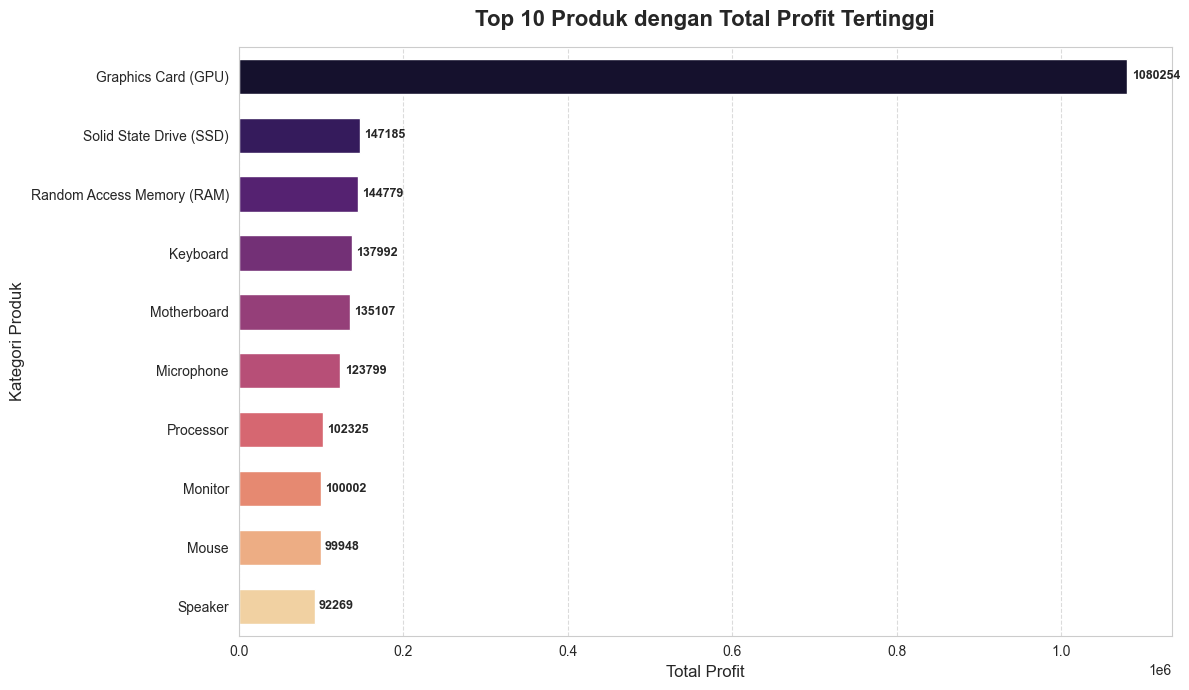

In [18]:
# Join transactions dengan products
transactions_products = transactions.merge(products, on="product_id", how="inner")

# Hitung profit langsung di dataframe hasil merge
transactions_products["profit"] = (
    transactions_products["total_amount"]
    - (transactions_products["cost_price"] * transactions_products["quantity"])
)

# Group by category untuk total profit
profit_per_product = (
    transactions_products.groupby("category", as_index=False)
    .agg(total_profit=("profit", "sum"))
    .sort_values(by="total_profit", ascending=False)
    .head(10)
)

profit_per_product["total_profit"] = profit_per_product["total_profit"].round(2)

# Set style seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(12, 7))

# Gunakan palet warna gradien
palette = sns.color_palette("magma", n_colors=len(profit_per_product))

barp = sns.barplot(
    data=profit_per_product,
    y="category",
    x="total_profit",
    palette=palette,
    width=0.6
)

# Tambahkan label angka di batang
for container in barp.containers:
    barp.bar_label(
        container, 
        fmt="%.0f", 
        padding=3, 
        fontsize=9, 
        weight="bold"
    )

# Hiasan tambahan
plt.title("Top 10 Produk dengan Total Profit Tertinggi", fontsize=16, weight="bold", pad=15)
plt.xlabel("Total Profit", fontsize=12)
plt.ylabel("Kategori Produk", fontsize=12)

# Hilangkan legend redundant
plt.legend([], [], frameon=False)

# Grid hanya di sumbu x
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

- Berdasarkan hasil visualisasi, terlihat bahwa kategori produk **`Graphics Card (GPU)`** merupakan penyumbang profit tertinggi bagi perusahaan, disusul oleh kategori produk lainnya.  
- Tingginya profit dari kategori ini dipicu oleh harga jual GPU yang relatif tinggi, sehingga menghasilkan total profit yang besar meskipun jumlah unit terjual tidak sebanyak kategori lain.  
- Menariknya, meskipun **`Processor Intel Core i3-12100F`** merupakan produk dengan penjualan unit terbanyak, namun dalam perhitungan total profit kategori **Processor** hanya menempati posisi ke-7.  
- Hal ini menunjukkan bahwa volume penjualan tinggi tidak selalu berbanding lurus dengan kontribusi profit, sehingga perusahaan perlu menyeimbangkan strategi antara produk **high demand** dan produk **high margin**.  

#### **C. Analisis Customers pada Transaksi**
Analisis ketiga berfokus pada hubungan antara DataFrame `customers` dengan `transactions`.  
Tujuan dari analisis ini adalah untuk memahami karakteristik pelanggan serta perilaku mereka dalam melakukan transaksi. Beberapa aspek yang dianalisis meliputi:  

1. **Jumlah Customer per State**  
   Analisis ini bertujuan untuk melihat distribusi jumlah pelanggan berdasarkan wilayah (state) sehingga dapat diketahui daerah dengan konsentrasi pelanggan terbanyak.  

2. **Tren Transaksi Berdasarkan Customer Type**  
   Analisis ini dilakukan untuk membandingkan aktivitas transaksi antara dua jenis pelanggan utama, yaitu **Wholesale** dan **Retail**, guna melihat perbedaan pola perilaku belanja.  

3. **Distribusi dan Pengelompokan Pelanggan**  
   Analisis ini mencakup beberapa variabel demografis dan ekonomi pelanggan, yaitu:  
   - **Usia** → divisualisasikan dalam bentuk **Histogram** untuk melihat pola distribusi umur pelanggan.  
   - **Gender** → divisualisasikan dalam bentuk **Pie Chart** untuk menunjukkan proporsi pelanggan pria dan wanita.  
   - **Kategori Pendapatan** → divisualisasikan dalam bentuk **Bar Chart** dengan parameter `hue=customer_type` untuk melihat distribusi pendapatan berdasarkan jenis pelanggan.  

##### **1. Top 10 Jumlah Transaksi per State**
Analisis pertama berfokus pada 10 state dengan jumlah transaksi terbanyak di wilayah Amerika Serikat.   Tujuan dari analisis ini adalah untuk mengidentifikasi wilayah dengan aktivitas transaksi tertinggi, sehingga dapat menjadi dasar dalam menentukan strategi pemasaran dan distribusi produk.  

C:\Users\Feby Renaldi\AppData\Local\Temp\ipykernel_6584\2540608277.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


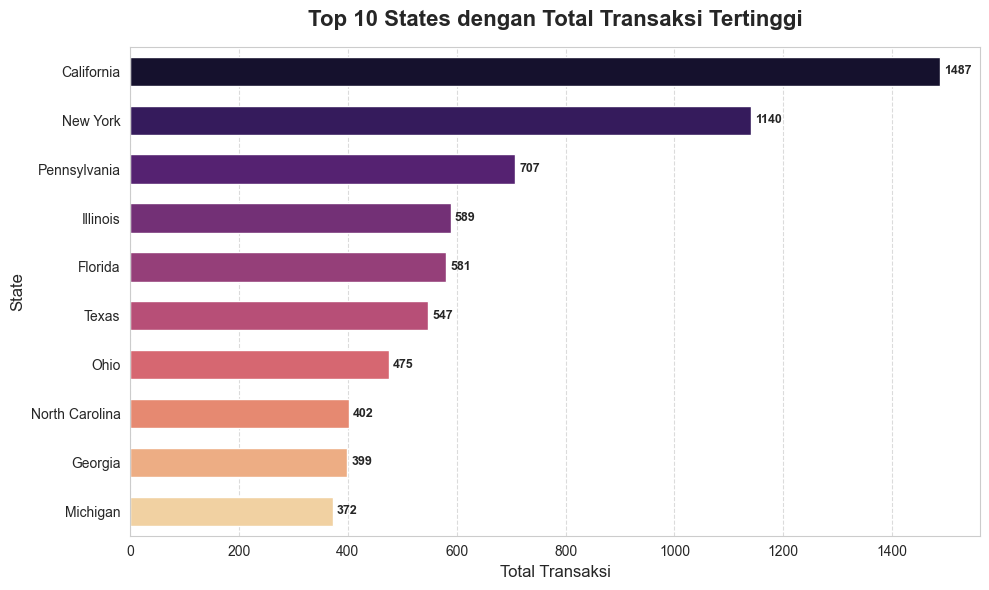

In [19]:
# Menggabungkan tabel customers dan transaksi
transactions_customers = transactions.merge(customers, 
                                            on = "customer_id", 
                                            how = "inner")

# Kalkulasi Top 10 State
top_state = (transactions_customers.groupby("state")["sale_id"]
             .count()
             .reset_index(name = "total_transaction")
             .sort_values(by = "total_transaction", ascending = False)
             .head(10)
             )

# Atur style
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

# Gunakan palet warna gradien
palette = sns.color_palette("magma", n_colors=len(top_state))

bars = sns.barplot(
    data=top_state,
    y="state",
    x="total_transaction",
    palette=palette,
    width=0.6
)

# Tambahkan label di batang
for container in bars.containers:
    bars.bar_label(container, fmt="%.0f", padding=3, fontsize=9, weight='bold')

# Hiasan tambahan
plt.title("Top 10 States dengan Total Transaksi Tertinggi", fontsize=16, weight='bold', pad=15)
plt.xlabel("Total Transaksi", fontsize=12)
plt.ylabel("State", fontsize=12)

# Hilangkan legend (karena redundant dengan sumbu Y)
plt.legend([], [], frameon=False)

# Grid hanya di sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- Berdasarkan hasil visualisasi, terlihat bahwa wilayah **California** merupakan state dengan jumlah transaksi terbanyak, disusul oleh **New York**, **Pennsylvania**, dan beberapa wilayah lainnya.  
- Temuan ini dapat menjadi dasar strategi perusahaan untuk memfokuskan kegiatan pemasaran di wilayah dengan tingkat transaksi tinggi. 
- Dengan demikian, perusahaan dapat lebih mengefisienkan anggaran biaya serta operasional pemasaran, sekaligus memaksimalkan potensi penjualan pada area yang memiliki konsentrasi pelanggan terbesar.  

##### **2. Tren Customer Type per Bulan**
Analisis selanjutnya berfokus pada tren pembelian pelanggan berdasarkan **customer_type** setiap bulan. Tujuan dari analisis ini adalah untuk membandingkan pola transaksi antara pelanggan **Wholesale** dan **Retail**, serta mengidentifikasi periode waktu tertentu di mana terjadi peningkatan atau penurunan aktivitas transaksi pada masing-masing segmen pelanggan.  

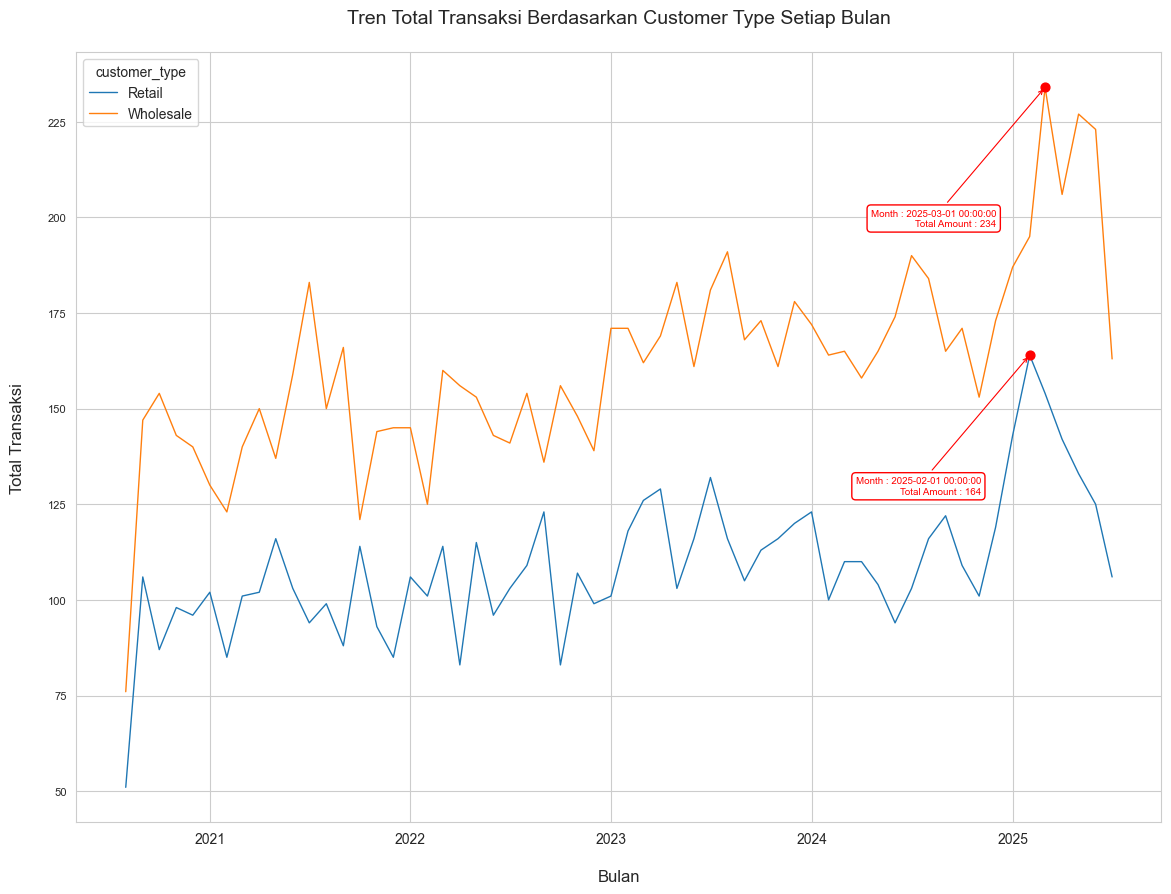

In [20]:
# Hitung transaksi per bulan per tipe customer
customer_monthly = (
    transactions_customers
    .groupby(["month", "customer_type"])["sale_id"]
    .count()
    .reset_index(name="total_transaction")
)

plt.figure(figsize=(14,10))

# Plot lineplot
sns.lineplot(
    x="month",
    y="total_transaction",
    data=customer_monthly,
    hue="customer_type",
    linewidth=1
)

# Cari titik maksimum tiap customer_type
for cust_type, group in customer_monthly.groupby("customer_type"):
    max_idx = group["total_transaction"].idxmax()
    max_row = group.loc[max_idx]

    plt.scatter(
        max_row["month"],
        max_row["total_transaction"],
        color="red",
        s=40,       # ukuran titik lebih kecil
        zorder=5
    )

    # Anotasi dengan kotak + panah, posisi turun & kiri
    plt.annotate(
        f"Month : {max_row['month']}\nTotal Amount : {max_row['total_transaction']}",
        xy=(max_row["month"], max_row["total_transaction"]),   # titik yang dituju panah
        xytext=(-35, -100),  # offset ke kiri (-x) dan ke bawah (-y)
        textcoords="offset points",
        ha="right",
        fontsize=7,   # ukuran font lebih kecil
        color="red",
        bbox=dict(boxstyle="round,pad=0.4", edgecolor="red", facecolor="white"),
        arrowprops=dict(arrowstyle="->", color="red", lw=0.8)  # panah lebih tipis
    )

plt.title("Tren Total Transaksi Berdasarkan Customer Type Setiap Bulan\n", fontsize=14)
plt.xlabel("\nBulan", fontsize=12)
plt.ylabel("Total Transaksi\n", fontsize=12)
plt.yticks(fontsize=8)
plt.show()

Dari hasil visualisasi grafik tren Total Transaksi per Bulan berdasarkan Customer Type (`Retail` vs `Wholesale`), dapat ditarik beberapa kesimpulan:

1. Volume transaksi customer `Wholesale` secara konsisten lebih tinggi dibandingkan dengan `Retail` hampir di semua periode waktu. Ini menunjukkan bahwa kontribusi terbesar transaksi berasal dari segmen `Wholesale`.
2. Kedua tipe customer mengalami tren peningkatan jangka panjang, meskipun ada fluktuasi musiman/periodik. Hal ini menandakan pertumbuhan aktivitas transaksi yang stabil dari waktu ke waktu.
3. Titik maksimum (peak) :
   - `Wholesale` mencapai puncaknya pada Maret 2025 dengan total transaksi sebanyak 234.
   - `Retail` mencapai puncaknya pada Februari 2025 dengan total transaksi sebanyak 164. Keduanya menunjukkan lonjakan aktivitas transaksi menjelang awal tahun 2025.
4. Kecenderungan fluktuatif terlihat jelas pada kedua tipe customer, dengan variasi bulanan yang cukup tinggi. Hal ini mengindikasikan adanya faktor eksternal (misalnya siklus penjualan, promosi, atau tren musiman) yang memengaruhi pola transaksi.

##### **3. Distribusi Usia Konsumen**
Analisis ini berfokus pada distribusi usia konsumen serta perbandingan berdasarkan gender. Tujuan dari analisis ini adalah untuk memahami karakteristik demografis pelanggan, sehingga strategi pemasaran dapat lebih tepat sasaran dan berjalan secara efektif.  

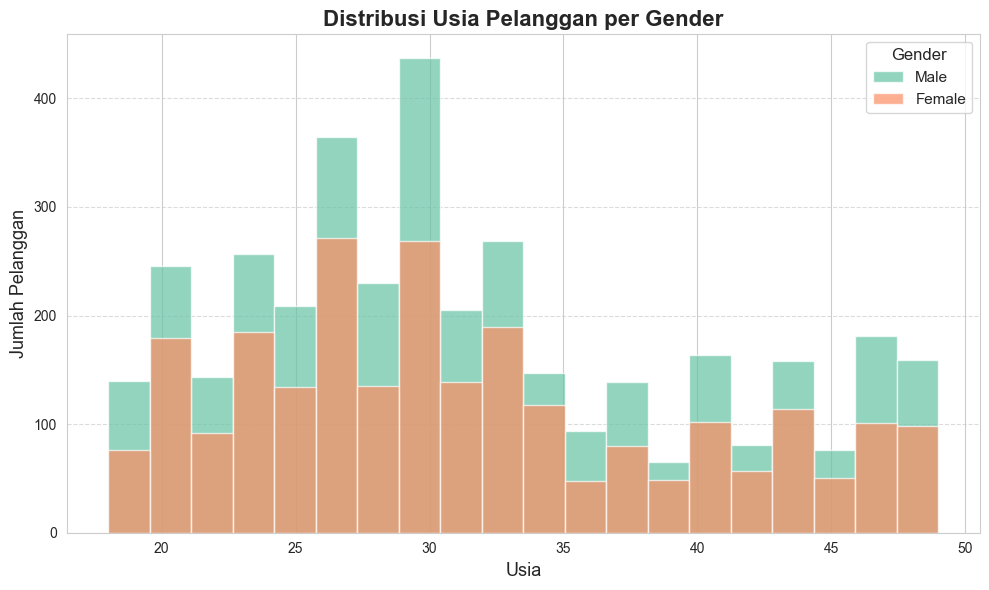

In [23]:
# Gunakan style seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

# Palet warna untuk gender
colors = sns.color_palette("Set2", n_colors=len(customers['gender'].unique()))

# Plot histogram per gender
for gender, color in zip(customers['gender'].unique(), colors):
    subset = customers[customers['gender'] == gender]
    plt.hist(
        subset['customer_age'], 
        bins=20, 
        alpha=0.7, 
        edgecolor='white', 
        color=color, 
        label=gender
    )

# Tambahkan detail visual
plt.title("Distribusi Usia Pelanggan per Gender", fontsize=16, weight='bold')
plt.xlabel("Usia", fontsize=13)
plt.ylabel("Jumlah Pelanggan", fontsize=13)
plt.legend(title="Gender", fontsize=11, title_fontsize=12, loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- Berdasarkan hasil visualisasi, terlihat bahwa pelanggan laki-laki lebih mendominasi dibandingkan pelanggan perempuan, yang sejalan dengan jumlah keseluruhan pelanggan laki-laki yang lebih banyak.  
- Selain itu, kelompok usia **25–30 tahun** merupakan segmen yang paling sering melakukan transaksi.  
- Temuan ini menjadi insight penting bagi perusahaan untuk memfokuskan strategi pemasaran pada rentang usia **20–30 tahun**, sehingga upaya promosi dan penawaran produk dapat lebih tepat sasaran dan efektif.  

##### **4. Segmentasi Pelanggan Berdasarkan Monthly Income**
Analisis ini bertujuan untuk mengelompokkan pelanggan berdasarkan pendapatan bulanan mereka. Segmentasi ini membantu perusahaan dalam memahami profil ekonomi pelanggan, sehingga strategi pemasaran dan penawaran produk dapat disesuaikan dengan kemampuan dan preferensi masing-masing segmen.  

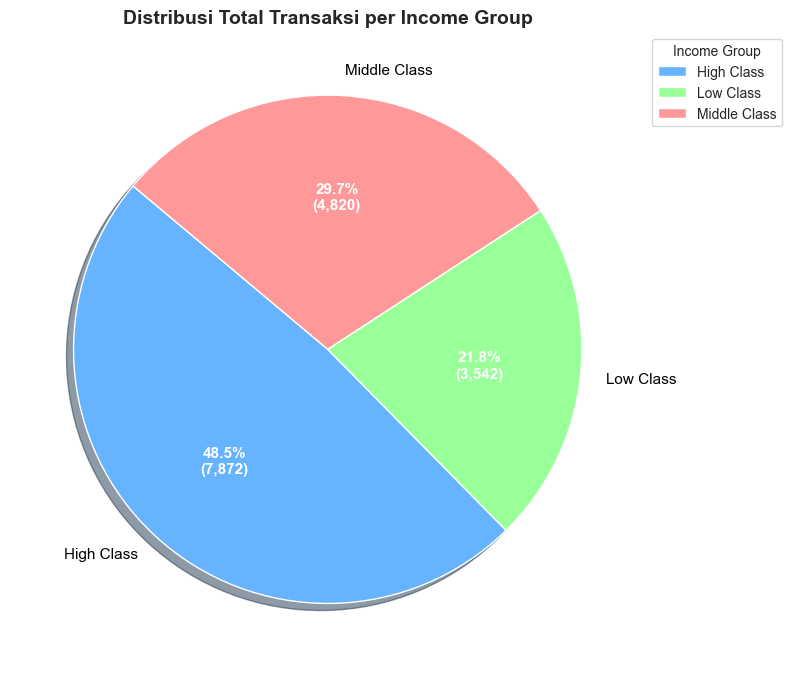

In [24]:
# Definisikan fungsi kategori income
def income_group(income):
    if income < 8000:
        return "Low Class"
    elif 10000 <= income < 15000:
        return "Middle Class"
    else:
        return "High Class"

# Tambahkan kolom kategori di customers
customers['income_group'] = customers['monthly_income'].apply(income_group)

# Gabungkan customers dengan transactions
transactions_customers = transactions.merge(customers[['customer_id','income_group']], 
                                            on='customer_id', how='left')

# Hitung total transaksi per kelompok income
transaction_by_income = (transactions_customers
                     .groupby('income_group')['sale_id']
                     .count()
                     .reset_index(name = 'total_transactions'))

# Hitung total transaksi per income group
transaction_by_group = (transactions_customers
                        .groupby('income_group')['sale_id']
                        .count()
                        .reset_index(name = 'total_transaction'))

# Pie chart
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    transaction_by_group['total_transaction'],
    labels=transaction_by_group['income_group'],
    autopct=lambda p: '{:.1f}%\n({:,.0f})'.format(p, 
               p/100*transaction_by_group['total_transaction'].sum()),
    startangle=140,
    colors=['#66b3ff','#99ff99','#ff9999'],
    wedgeprops={"edgecolor":"white", "linewidth":1, "antialiased":True},
    textprops={'fontsize':11, 'color':'black'},
    shadow=True
)

# Tambahkan legend
plt.legend(
    wedges, 
    transaction_by_group['income_group'], 
    title="Income Group",
    loc="upper left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.setp(autotexts, size=11, weight="bold", color="white")
plt.title("Distribusi Total Transaksi per Income Group", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

- Berdasarkan hasil visualisasi, terlihat bahwa **pie chart** menunjukkan dominasi kelompok pelanggan **High Class**, yang menyumbang **48,5%** dari total transaksi.  
- Disusul oleh kelompok pelanggan **Middle Class** dengan persentase **29,7%**, dan **Low Class** sebesar **21,8%**.  
- Temuan ini memberikan insight penting bagi perusahaan untuk menyesuaikan strategi pemasaran dan penawaran produk sesuai dengan segmen pendapatan pelanggan.  

Secara keseluruhan, hasil analisis data **transactions**, **products**, dan **customers** memberikan wawasan yang komprehensif mengenai perilaku konsumen, performa produk, serta karakteristik pelanggan.  
Temuan-temuan ini dapat dijadikan dasar dalam pengambilan keputusan bisnis, mulai dari strategi pemasaran, pengelolaan stok produk, penetapan harga, hingga segmentasi pelanggan yang lebih tepat sasaran.  
Dengan pemahaman yang mendalam terhadap data, perusahaan dapat meningkatkan efisiensi operasional dan memaksimalkan potensi keuntungan di pasar Amerika Serikat.